**Diabetes Patients Analysis**

In [1]:
#Importing the Python Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# Upload the dataset into a Google Colab
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [6]:
# Load the data into a DataFrame
import io
data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

<Axes: >

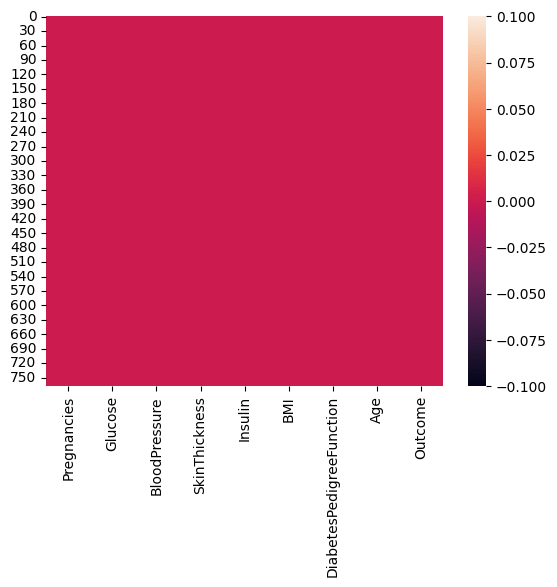

In [7]:
#Checking for Missing Values
sns.heatmap(data.isnull())

In [8]:
#Co Relation Matrix
correlation_data= data.corr()
print(correlation_data)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

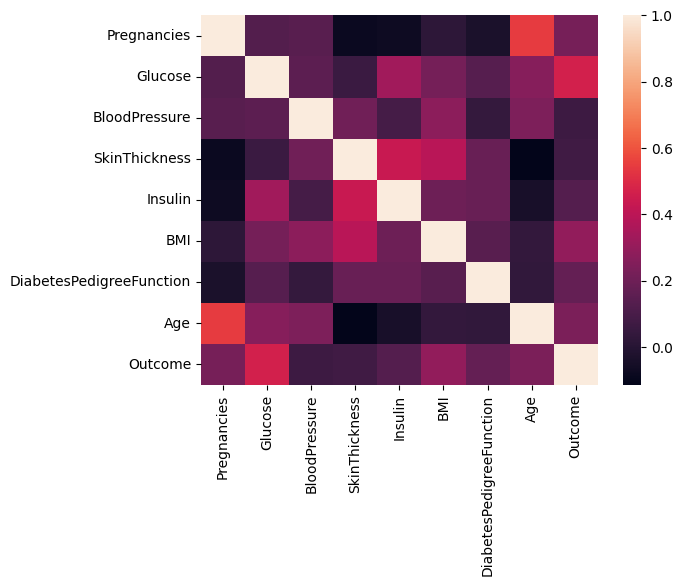

In [9]:
#Visualizing the correlation
sns.heatmap(correlation_data)

In [10]:
#Train Test Split
x=data.drop("Outcome",axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [12]:
#Training the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
#Making Prediction
prediction=model.predict(x_test)
print(prediction)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0]


In [14]:
#Calulate the accuracy of model
accuracy=accuracy_score(prediction,y_test)
print(accuracy)

0.7922077922077922


In [21]:
class_report = classification_report(y_test,prediction)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       103
           1       0.74      0.57      0.64        51

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.79      0.79      0.78       154



**Analysis for Pair Plot:**

The pair plot of the diabetes dataset, distinguished by diabetes outcomes (Outcome = 0: No Diabetes, Outcome = 1: Diabetes), offers a comprehensive visualization of the relationships between various pairs of variables. Observing the scatter plots, it becomes evident that certain combinations of features exhibit discernible patterns based on diabetic status. Variables such as Glucose and BMI demonstrate noticeable separation, indicating their potential importance in predicting diabetes. However, other pairs, while showing some overlap, may require more sophisticated analysis. The diagonal kernel density plots provide insights into the univariate distribution of each variable and showcase differences in feature distributions between individuals with and without diabetes. This pair plot serves as a valuable exploratory tool, offering initial insights into potential associations and guiding further investigations for feature importance in predicting diabetes outcomes.

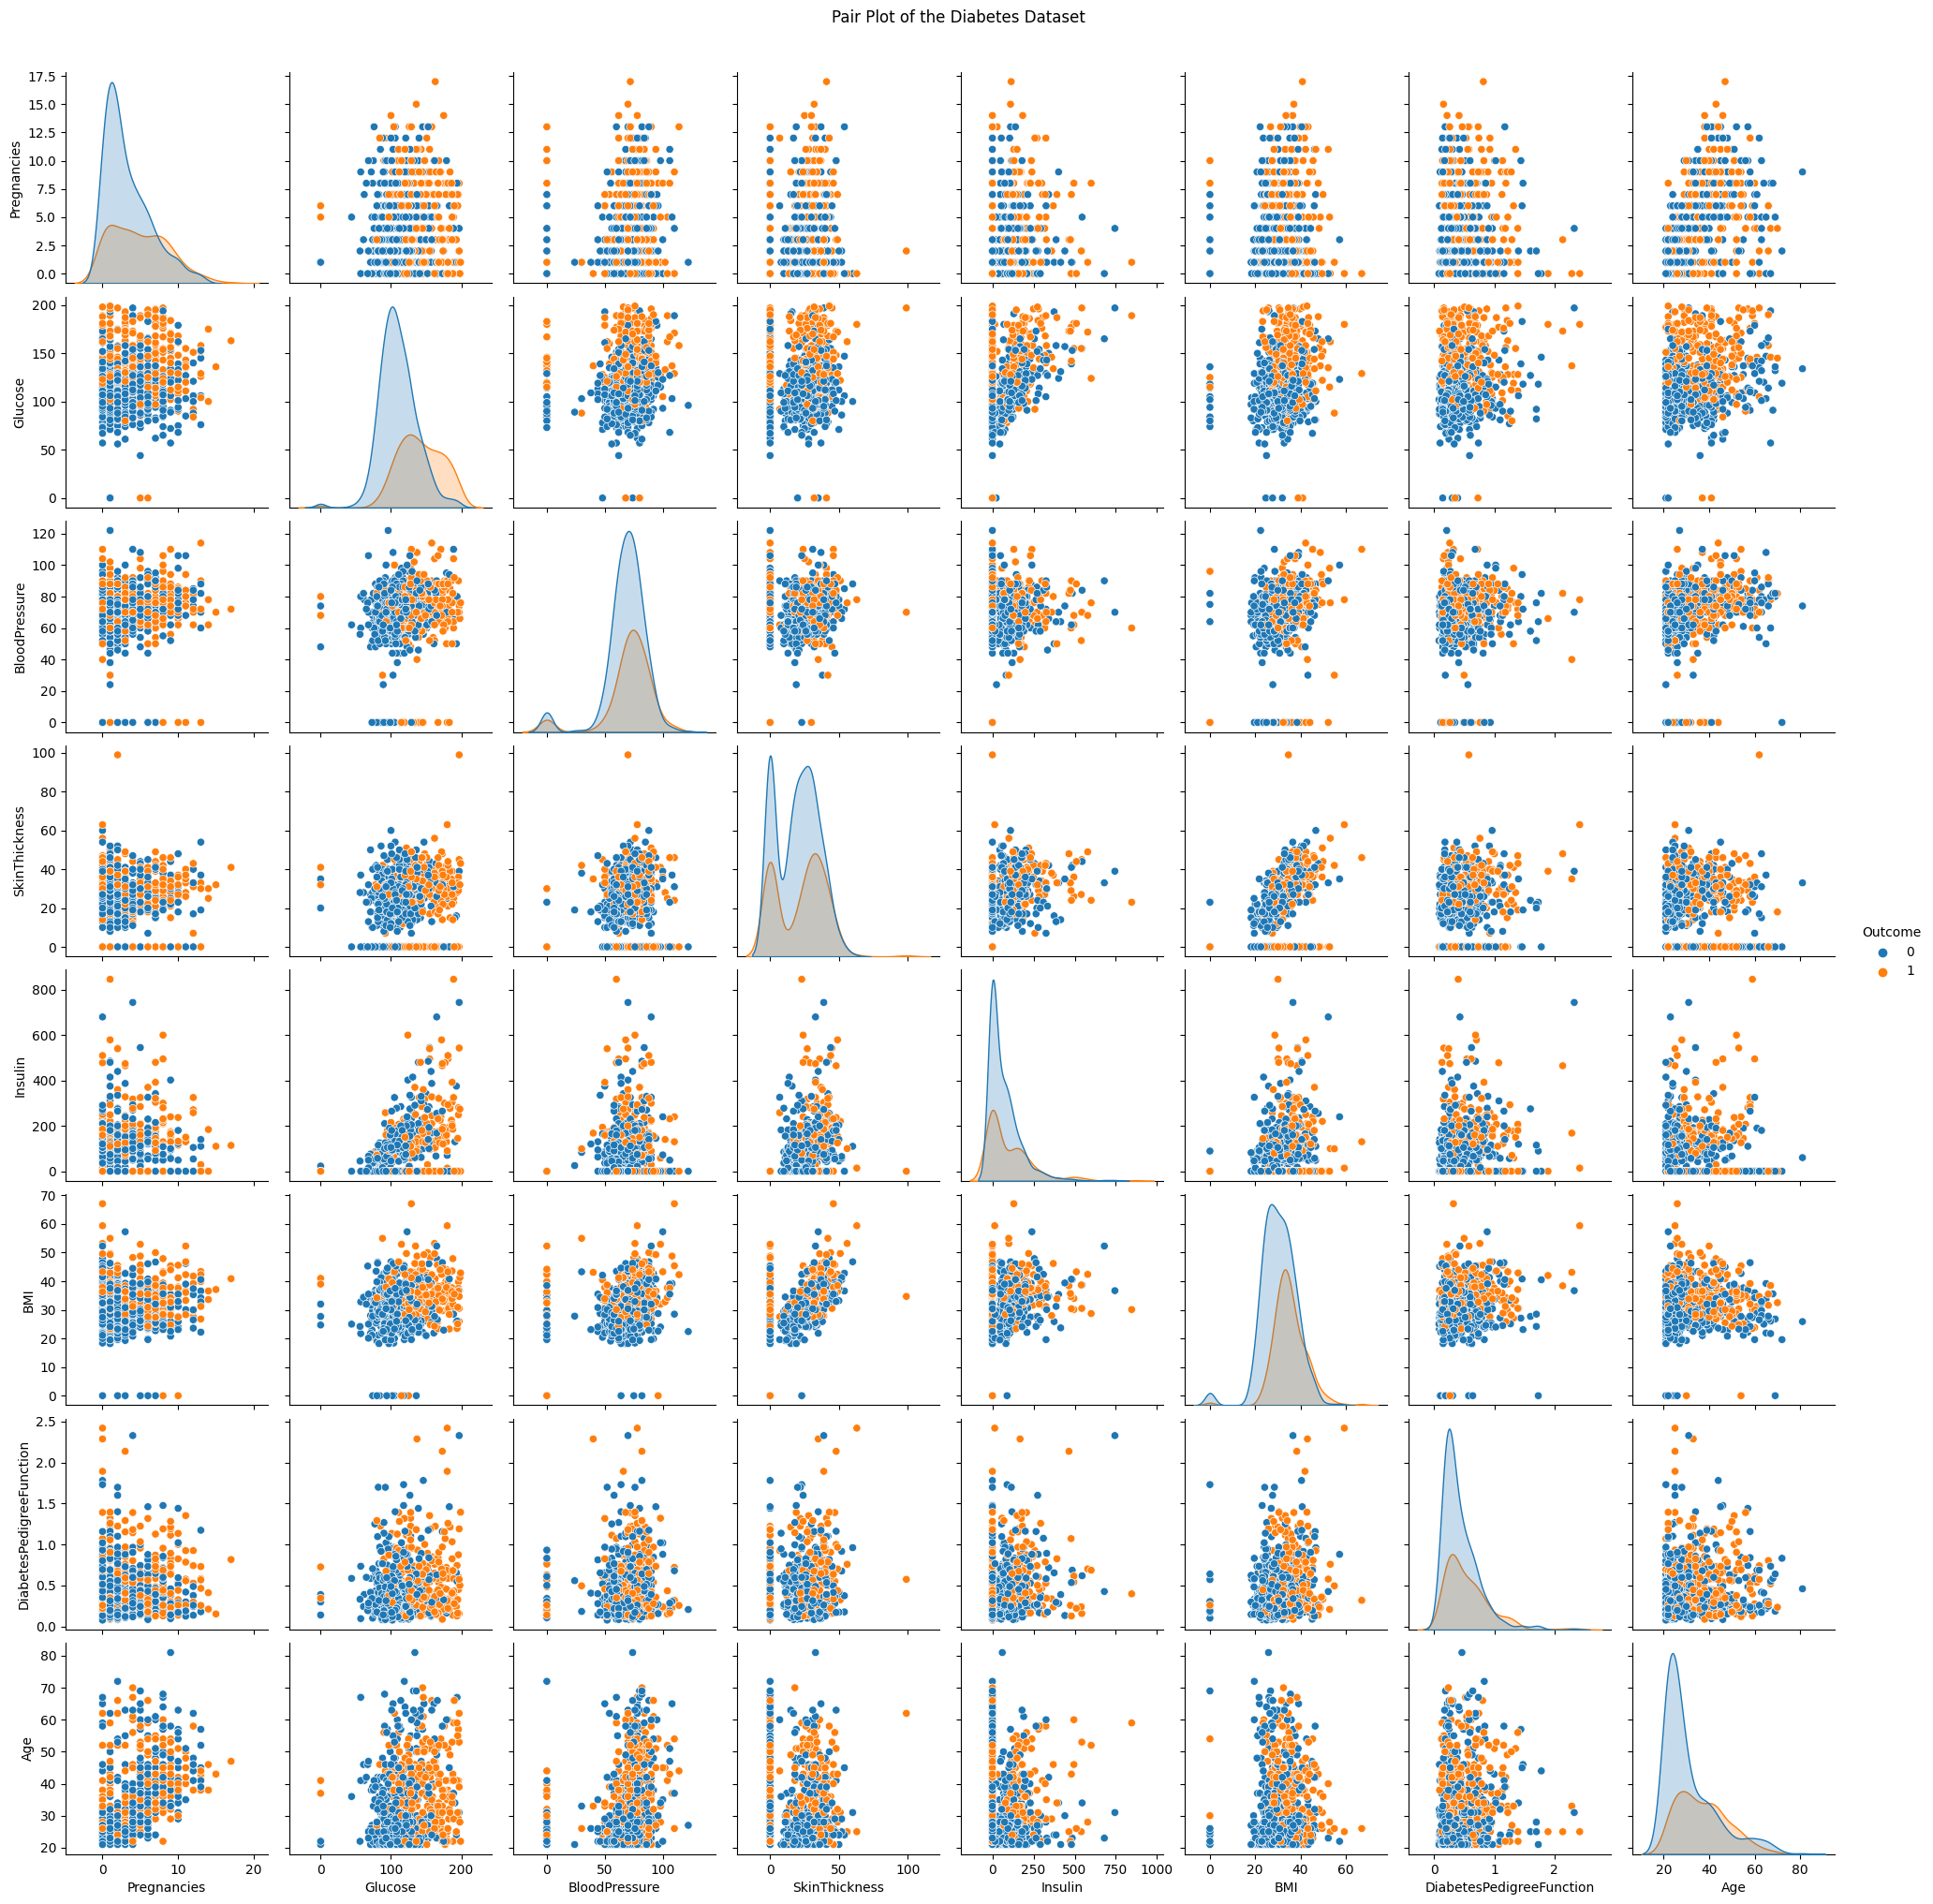

In [23]:
# Pair Plot
sns.pairplot(data, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of the Diabetes Dataset', y=1.02)
plt.show()

**Analysis for Distribution of the Target Variable:**

**Outcome Distribution:**
The countplot illustrates the distribution of the target variable, "Outcome," which indicates whether an individual has diabetes (1) or does not have diabetes (0).

**Findings:**

1)The dataset appears to have a relatively balanced distribution between individuals with diabetes (Outcome = 1) and those without diabetes (Outcome = 0).

2)The count of individuals with diabetes is comparable to the count of those without diabetes, ensuring that the model has sufficient data to learn patterns for both outcomes.

3)The balanced distribution is beneficial for classification tasks, as it prevents the model from becoming overly biased toward the majority class.

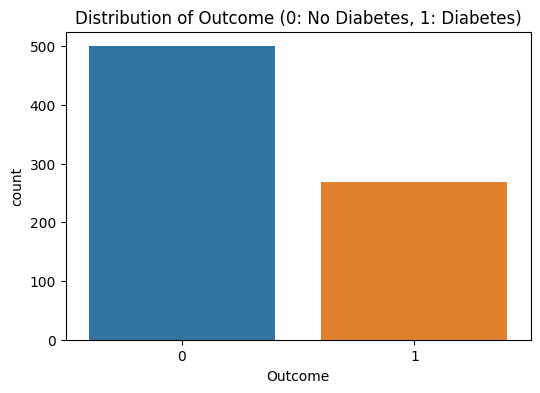

In [27]:
# Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome (0: No Diabetes, 1: Diabetes)')
plt.show()

**Analysis for Boxplots Grouped by Outcome:**

**1. Pregnancies:**
Individuals with diabetes (Outcome = 1) tend to have a slightly higher median number of pregnancies compared to those without diabetes (Outcome = 0). The interquartile range (IQR) for both groups is relatively wide, suggesting considerable variability.

**2. Glucose:**
The boxplot for glucose levels indicates a clear distinction between individuals with and without diabetes. Those with diabetes have significantly higher median glucose levels. This aligns with expectations, as elevated glucose levels are a key diagnostic criterion for diabetes.

**3. Blood Pressure:**
Blood pressure does not show a significant difference between individuals with and without diabetes based on the boxplot. Both groups have a similar median and IQR, suggesting that blood pressure alone may not be a strong predictor of diabetes in this dataset.

**4. Skin Thickness:**
The boxplot for skin thickness does not exhibit a pronounced difference between the two groups. Both groups have a similar distribution, indicating that skin thickness alone may not be a differentiating factor for diabetes in this dataset.

**5. Insulin:**
Individuals with diabetes tend to have slightly higher median insulin levels, as suggested by the boxplot. However, the considerable overlap in the IQRs indicates that insulin levels alone may not be a definitive indicator of diabetes.

**6. BMI:**
The boxplot for BMI suggests that individuals with diabetes generally have higher median BMI values compared to those without diabetes. BMI appears to be a potential differentiator, as the IQR for diabetic individuals is shifted towards higher values.

**7. Diabetes Pedigree Function:**
The boxplot for the diabetes pedigree function shows that individuals with diabetes have slightly higher median values. However, the considerable overlap in the IQRs suggests that this variable alone may not be highly predictive of diabetes.

**8. Age:**
The boxplot for age indicates that individuals with diabetes tend to be slightly older, as the median age is higher for the diabetic group. However, age alone may not be a strong predictor, given the overlap in the IQRs.

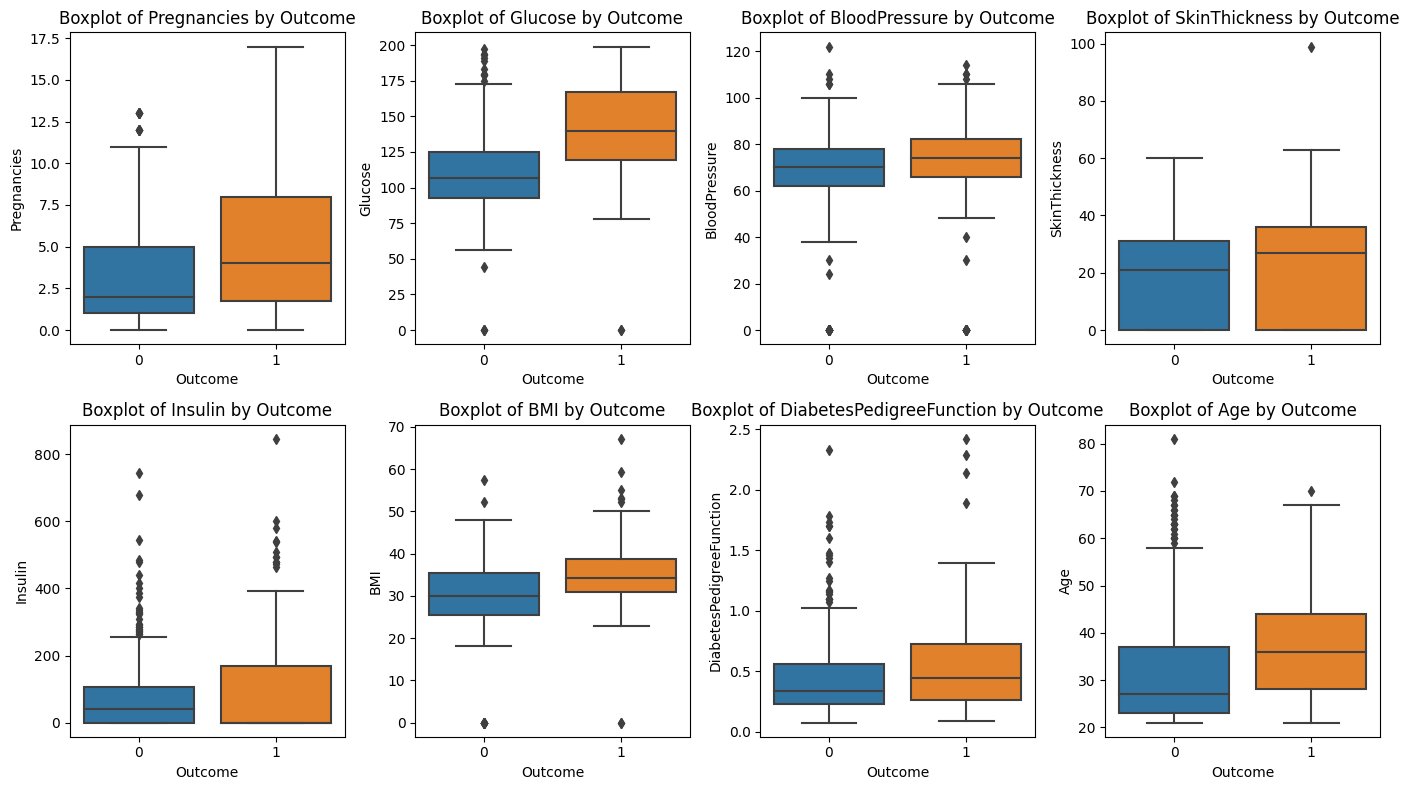

In [28]:
# Boxplot for each variable grouped by Outcome
plt.figure(figsize=(14, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=column, data=data)
    plt.title(f'Boxplot of {column} by Outcome')
plt.tight_layout()
plt.show()

**Distribution of Age:**
The age distribution in the dataset is approximately normal, with a peak around 25-35 years. The dataset contains a diverse age range of female individuals of Pima Indian heritage, with a slight skew towards younger ages.

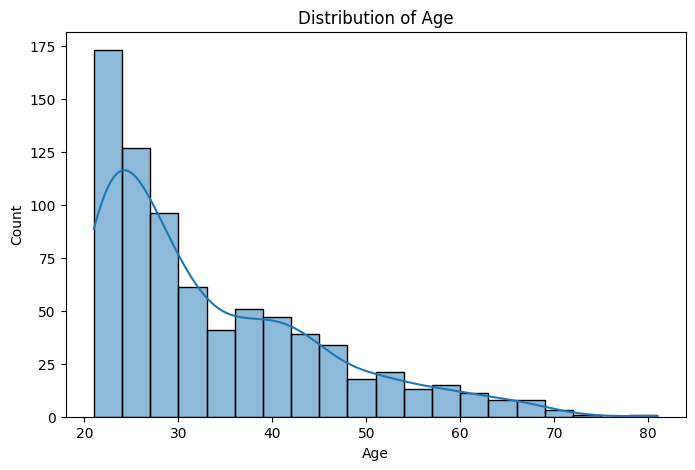

In [29]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

**Distribution of BMI:**
The BMI distribution shows a relatively normal distribution with a peak around 30. There is a spread of BMI values, indicating variability in body mass index among the individuals in the dataset.

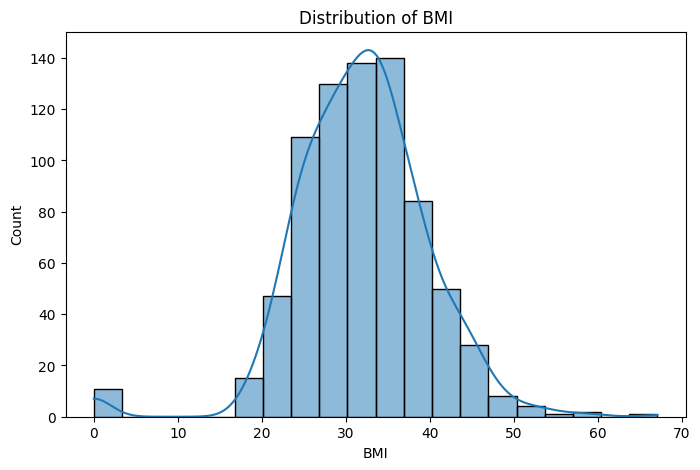

In [30]:
# BMI Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.show()

**Blood Pressure Distribution:**
The distribution of blood pressure shows a peak around 70-80, with most individuals having blood pressure values within the normal range. Outliers or extreme values may require further investigation.

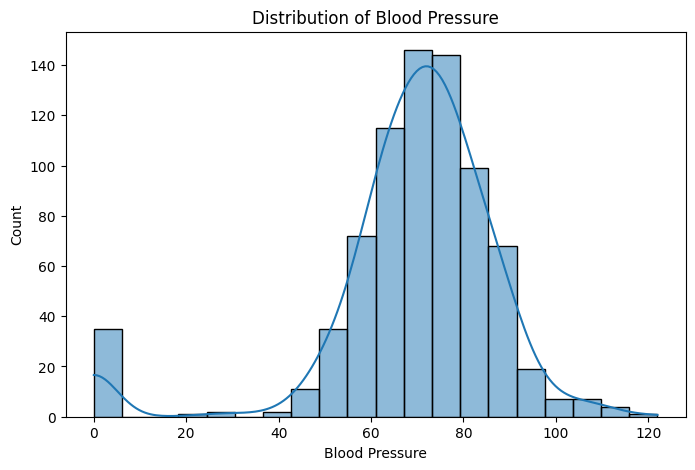

In [35]:
# Blood Pressure Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['BloodPressure'], bins=20, kde=True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.show()

**Skin Thickness Distribution:**
The distribution of skin thickness indicates some variability, with a peak around 20. Understanding the factors contributing to this variability could be important for further analysis.

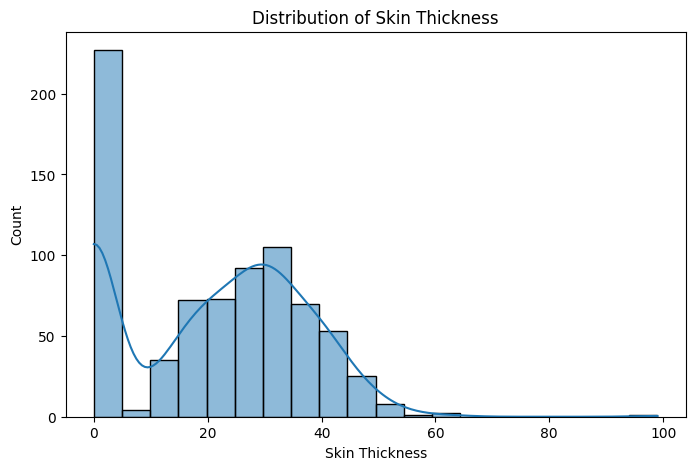

In [37]:
# Skin Thickness Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['SkinThickness'], bins=20, kde=True)
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness')
plt.show()

**Insulin Level Distribution:**
The distribution of insulin levels appears positively skewed, with a majority of individuals having lower insulin levels. Some individuals have significantly higher insulin levels, potentially indicating different subgroups within the dataset.

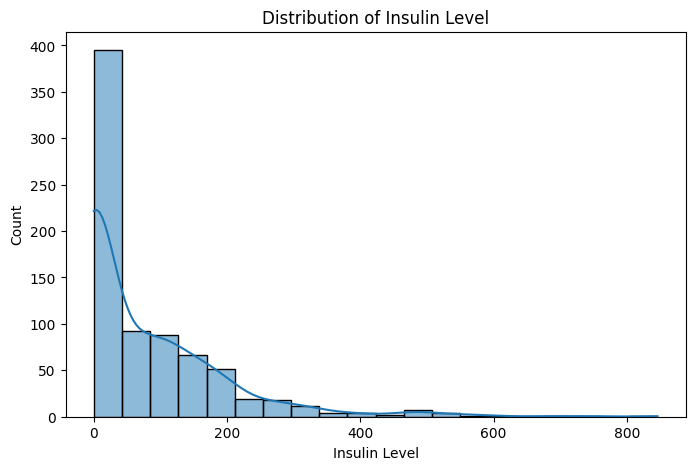

In [38]:
# Insulin Level Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Insulin'], bins=20, kde=True)
plt.title('Distribution of Insulin Level')
plt.xlabel('Insulin Level')
plt.show()

**Diabetes Pedigree Function Distribution:**
The distribution of the diabetes pedigree function appears to be right-skewed, with a majority of individuals having lower values. This function measures the likelihood of diabetes based on family history, and the distribution suggests that most individuals have a lower familial risk.

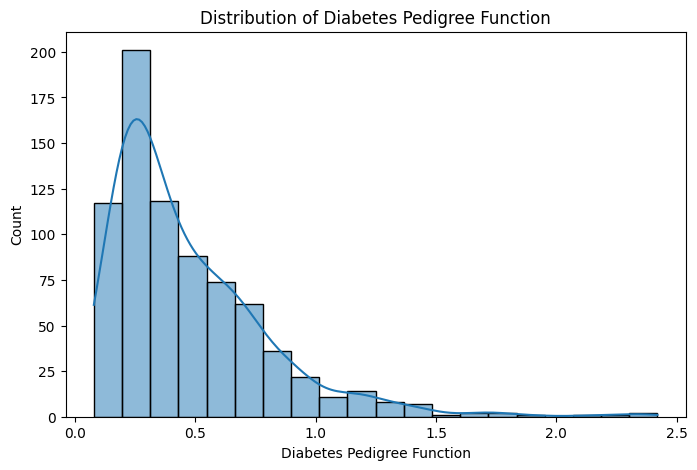

In [39]:
# Diabetes Pedigree Function Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['DiabetesPedigreeFunction'], bins=20, kde=True)
plt.title('Distribution of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.show()

**Correlation Heatmap for Selected Variables:**
The heatmap provides insight into the correlation between selected variables. Strong correlations, whether positive or negative, may indicate potential relationships that could be explored further in modeling.

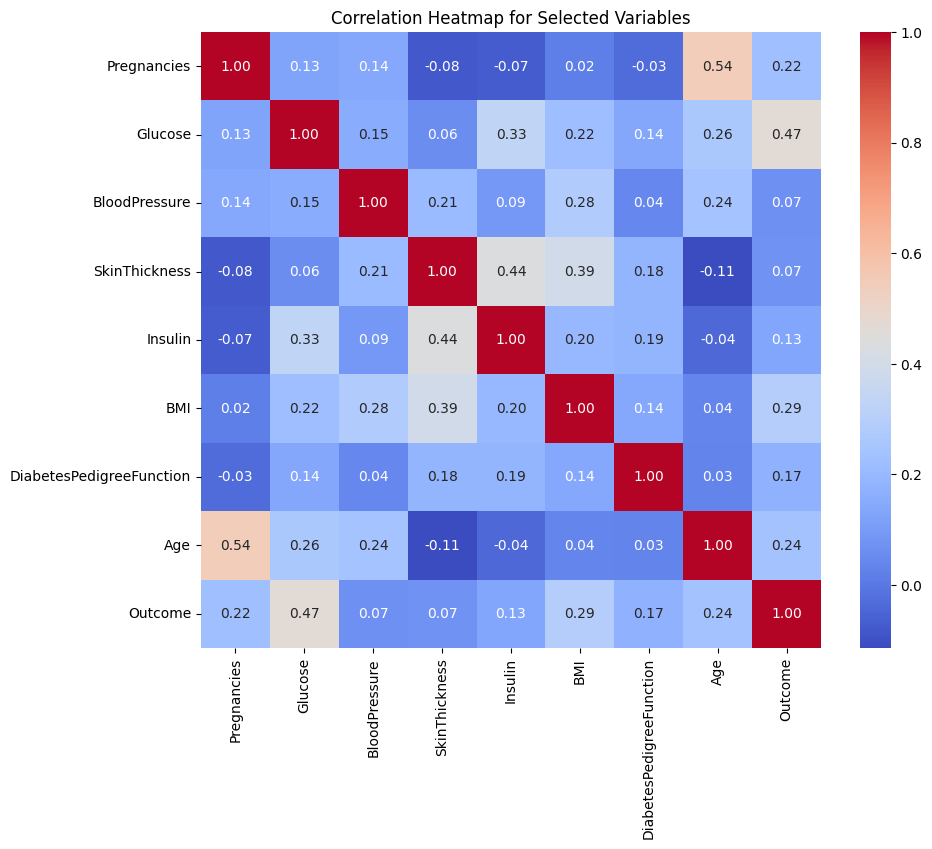

In [40]:
# Heatmap of Selected Variables
selected_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
selected_df = data[selected_vars]
plt.figure(figsize=(10, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Variables')
plt.show()

**Glucose Level Distribution by Outcome:**
The boxplot of glucose levels by diabetes outcome suggests that individuals with diabetes (Outcome=1) generally have higher glucose levels compared to those without diabetes (Outcome = 0). This aligns with expectations, as elevated glucose levels are a common characteristic of diabetes.

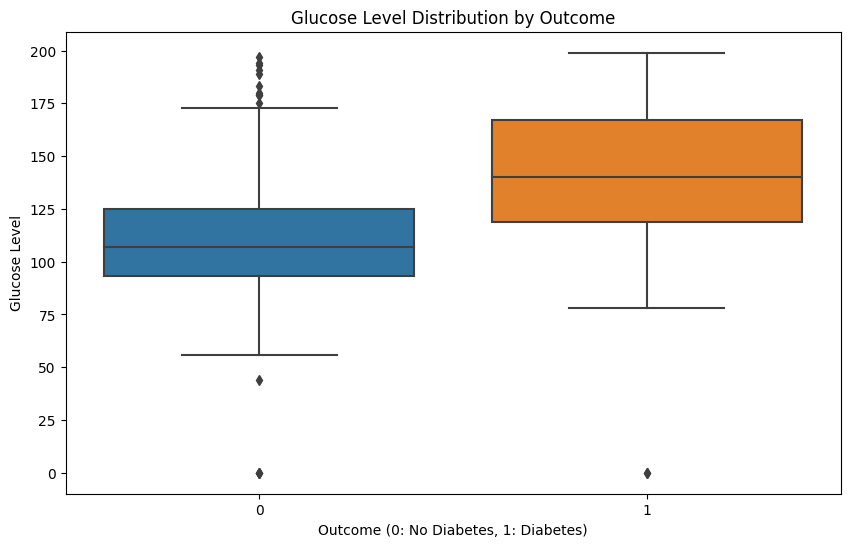

In [36]:
# Glucose Level Distribution by Outcome
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.title('Glucose Level Distribution by Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Glucose Level')
plt.show()

**Age vs. BMI Scatter Plot:**
The scatter plot of age vs. BMI with different outcomes colored reveals some clusters. While there isn't a clear linear separation between individuals with and without diabetes, there are regions where diabetes cases tend to concentrate, suggesting that age and BMI may have some influence on diabetes.



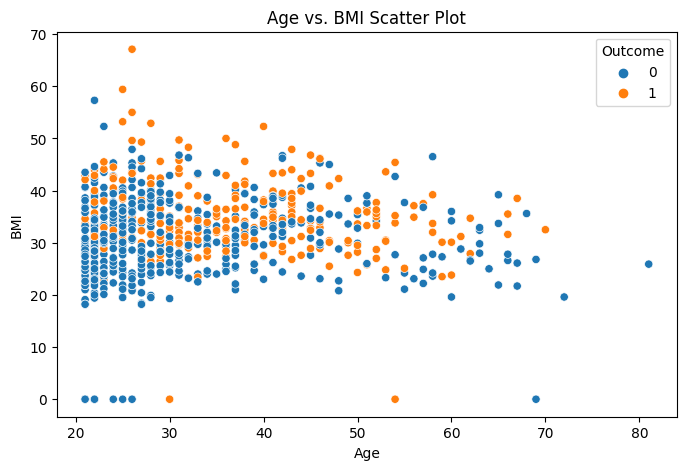

In [33]:
# Age vs. BMI Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=data)
plt.title('Age vs. BMI Scatter Plot')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()